# Ejercicios

In [1]:
import pandas as pd
import numpy as np

import warnings

from pathlib import Path

import matplotlib.pyplot as plt

data_path = Path('../data')
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(data_path / 'house.csv')
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


## Ejercicio 1

Usando el conjunto de datos de 'houses' usado en la teoría, implementa el código necesario para:

- Añade una nueva columna al DF con nombre 'price_grp'. Esta columna tendrá valores entre 0 y 5, siendo 0 el 20% de fila con el precio más barato, y 5, el 20% de casas con el precio más caro.
- Comprueba si hay valores missings, y si es así, sustituyelo por otro valor.
- ¿Cuál es el precio medio de las casas?

Comenzamos el ejercicio

- Añade una nueva columna al DF con nombre 'price_grp'. Esta columna tendrá valores entre 0 y 5, siendo 0 el 20% de fila con el precio más barato, y 5, el 20% de casas con el precio más caro.

In [3]:
price_grp = pd.qcut(data['price'], q = 5, labels = np.arange(5))
price_grp

0       1
1       4
2       1
3       2
4       3
       ..
4595    1
4596    3
4597    2
4598    0
4599    0
Name: price, Length: 4600, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [4]:
data = data.assign(price_grp = price_grp)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_grp
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,4
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,3


- Comprueba si hay valores missings, y si es así, sustituyelo por otro valor.

In [6]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
price_grp        0
dtype: int64

- ¿Cuál es el precio medio de las casas?

In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
data['price'].mean()

551962.9884732141

In [11]:
data.bedrooms.unique()

array([3., 5., 4., 2., 6., 7., 9., 1., 8., 0.])

## Ejercicio 2

Genera un dataframe que contenga el número medio de baños ('bathrooms') y plantas ('floors') por cada valor de la variable 'condition'.

Genera otro dataframe con el precio min y máximo (mayores que 0) por cada valor de la variable 'condition'.

Une ambos dataframes para tener un último DF con toda la info

In [18]:
df1 = data.groupby('condition').agg({
    'bathrooms' : 'mean',
    'floors' : 'mean'
})
df1

,bathrooms,floors
condition,,
1,1.166667,1.083333
2,1.437500,1.156250
3,2.276957,1.651130
4,1.935903,1.277157
5,2.107471,1.301149


In [24]:
df2 = data.query('price > 0').groupby('condition').agg({
    'price' : ['min', 'max']
})
df2

price            
               min         max
condition                     
1           7800.0    550000.0
2          80000.0   2555000.0
3          83000.0  12899000.0
4          83300.0  26590000.0
5          83300.0   3200000.0

In [28]:
df = df1.join(df2, on = 'condition')
df

,bathrooms,floors,"(price, min)","(price, max)"
condition,,,,
1,1.166667,1.083333,7800.0,550000.0
2,1.437500,1.156250,80000.0,2555000.0
3,2.276957,1.651130,83000.0,12899000.0
4,1.935903,1.277157,83300.0,26590000.0
5,2.107471,1.301149,83300.0,3200000.0


In [29]:
df[('price', 'min')]

condition
1     7800.0
2    80000.0
3    83000.0
4    83300.0
5    83300.0
Name: (price, min), dtype: float64

## Ejercicio 3

Genera una pivot table que muestre el precio medio por planta y condición (floors y condition). Es decir, la tabla debe mostrar información del tipo:

- Las casa con 1 planta y condición 1 tienen de media un precio de 282560€
- Las casa con 2 planta y condición 3 tienen de media un precio de 622919€

Rellena los valores missings con 0.

Por último, representa los valores de las casas de una planta en un gráfico de barras

In [71]:
pv = pd.pivot_table(data = data, index = 'condition', columns = 'floors', values = 'price', aggfunc=np.mean)
pv

floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,NaN,NaN,NaN,NaN
2,244226.000000,304077.500000,1.019333e+06,NaN,NaN,NaN
3,446558.941667,526978.427508,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537639,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,NaN
5,493234.266874,698686.446964,9.978914e+05,2.038333e+06,7.700000e+05,NaN


In [72]:
pv.fillna(0, inplace = True)
pv

floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0
2,244226.000000,304077.500000,1.019333e+06,0.000000e+00,0.000000e+00,0.0
3,446558.941667,526978.427508,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537639,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,0.0
5,493234.266874,698686.446964,9.978914e+05,2.038333e+06,7.700000e+05,0.0


<AxesSubplot:xlabel='condition'>

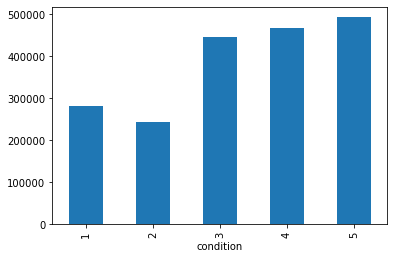

In [73]:
pv[1.0].plot(kind = 'bar')